In [ ]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this analysis, I will try to answer the following 3 questions:

*  **What kinds of property are the favorate type in airbnb?**
* **Which neighborhood are most popular?**
* **How well can I predict the price(in airbnb) of a property based on the data?**

#### 1.Data Exploration
In this part, I briefly check 3 datasets, the rows and columns in the datasets, and check if there are nulls or duplicates in rows or columns

In [ ]:
# import datasets
df_calendar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udacity_projects/ds_project/calendar.csv')
df_listing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udacity_projects/ds_project/listings.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udacity_projects/ds_project/reviews.csv')

In [ ]:
# explore columns in the datasets
print(df_calendar.columns)
print(df_listing.columns)
print(df_reviews.columns)

Index(['listing_id', 'date', 'available', 'price'], dtype='object')
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates'

NOTE: It seems the 'listing.csv' has all the information I need to answer my 3 questions. So I will focus on analyze the 'listing.csv'.

In [ ]:
#Find out the rows and columns of the dataset
df_listing.shape

(3818, 92)

In [ ]:
#take a look at the datatype and check out null values for the dataset
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
# check if there are duplicates in rows
sum(df_listing.duplicated())


0

In [ ]:
# check if there are duplicates in columns
sum(df_listing.T.duplicated())

2

#### 2. Data wrangling
In this part,I will clean up the listing dataset,and prepare 3 sub-datasets for each of my questions. (Since listing dataset has so many columns, choose the necessary columns and create new datasets with the columns will save time and space for my analysis)

In [ ]:
#remove duplicated columns
df = df_listing.T.drop_duplicates().T

* **Create subdatasets for each question**

In [ ]:
# create dataset-df1 for question 1 with necessary columns
df1 = df[['id','room_type','property_type','bathrooms','bedrooms','number_of_reviews']]
df1.head(2)

,id,room_type,property_type,bathrooms,bedrooms,number_of_reviews
0,241032,Entire home/apt,Apartment,1.0,1.0,207
1,953595,Entire home/apt,Apartment,1.0,1.0,43


In [ ]:
# create dataset-df2 for question 2 with necessary columns
df2 = df[['id','neighbourhood_group_cleansed','zipcode','number_of_reviews']]
df2.head(2)

,id,neighbourhood_group_cleansed,zipcode,number_of_reviews
0,241032,Queen Anne,98119,207
1,953595,Queen Anne,98119,43


In [ ]:
# create dataset-df3 for question 3 with necessary columns
df3 = df[['id','room_type','property_type','bathrooms','bedrooms','accommodates','amenities','neighbourhood_group_cleansed','zipcode','price','number_of_reviews','review_scores_rating']]
df3.head(2)

,id,room_type,property_type,bathrooms,bedrooms,accommodates,amenities,neighbourhood_group_cleansed,zipcode,price,number_of_reviews,review_scores_rating
0,241032,Entire home/apt,Apartment,1.0,1.0,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Queen Anne,98119,$85.00,207,95.0
1,953595,Entire home/apt,Apartment,1.0,1.0,4,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",Queen Anne,98119,$150.00,43,96.0


* **Data cleaning for each sub-datasets**

#### For df1:
* remove null values(since the number of null values are very small)
* correct the datatype for columns

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3818 non-null   object
 1   room_type          3818 non-null   object
 2   property_type      3817 non-null   object
 3   bathrooms          3802 non-null   object
 4   bedrooms           3812 non-null   object
 5   number_of_reviews  3818 non-null   object
dtypes: object(6)
memory usage: 179.1+ KB


In [ ]:
# drop nulls
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3795 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3795 non-null   object
 1   room_type          3795 non-null   object
 2   property_type      3795 non-null   object
 3   bathrooms          3795 non-null   object
 4   bedrooms           3795 non-null   object
 5   number_of_reviews  3795 non-null   object
dtypes: object(6)
memory usage: 207.5+ KB


In [ ]:
#correct datatype
df1['number_of_reviews']=df1['number_of_reviews'].astype('float')
df1['bedrooms']=df1['bedrooms'].astype('float')
df1['bathrooms']=df1['bathrooms'].astype('float')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3795 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3795 non-null   object 
 1   room_type          3795 non-null   object 
 2   property_type      3795 non-null   object 
 3   bathrooms          3795 non-null   float64
 4   bedrooms           3795 non-null   float64
 5   number_of_reviews  3795 non-null   float64
dtypes: float64(3), object(3)
memory usage: 207.5+ KB


<ipython-input-88-3d939c6cb131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['number_of_reviews']=df1['number_of_reviews'].astype('float')
<ipython-input-88-3d939c6cb131>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bedrooms']=df1['bedrooms'].astype('float')
<ipython-input-88-3d939c6cb131>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
#check the value of a columns is reasonable
df1['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
#check the value of a columns is reasonable
df1['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
      dtype=object)

In [ ]:
#check the value of a columns is reasonable
df1['bathrooms'].unique()

array([1. , 4.5, 2. , 3.5, 1.5, 2.5, 3. , 0.5, 4. , 0. , 8. , 5. ])

In [ ]:
#check the value of a columns is reasonable
df1['bedrooms'].unique()

array([1., 5., 0., 3., 2., 6., 4., 7.])

In [ ]:
#check the value of a columns is reasonable
df1['number_of_reviews'].min()

0.0

In [ ]:
#check the value of a columns is reasonable
df1.describe()

,bathrooms,bedrooms,number_of_reviews
count,3795.000000,3795.000000,3795.000000
mean,1.259947,1.308037,22.121212
std,0.590808,0.884903,37.563400
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000
50%,1.000000,1.000000,9.000000
75%,1.000000,2.000000,26.000000
max,8.000000,7.000000,474.000000


In [ ]:
#double check duplicates
sum(df1.duplicated())

0

#### For df2:
* remove null values(since the number of null values are very small)
* correct the datatype for columns

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            3818 non-null   object
 1   neighbourhood_group_cleansed  3818 non-null   object
 2   zipcode                       3811 non-null   object
 3   number_of_reviews             3818 non-null   object
dtypes: object(4)
memory usage: 119.4+ KB


In [ ]:
# I drop the rows with nulls in 'zipcode' column
df2 = df2.dropna(subset='zipcode')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3811 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            3811 non-null   object
 1   neighbourhood_group_cleansed  3811 non-null   object
 2   zipcode                       3811 non-null   object
 3   number_of_reviews             3811 non-null   object
dtypes: object(4)
memory usage: 148.9+ KB


In [ ]:
### This is an unused code cell, since I replace 'neighbourhood' with 'neighbourhood_group_cleansed'
# it is unreasonable to impute the neighbourhood,
# so I will create a column to mark whether neighbourhood is null or not,
# and then perform analysis based on it
#df2['neighbour_is_null']=df2['neighbourhood'].isnull().apply(lambda x: 'Yes' if x else 'No')
#df2.head(2)

In [ ]:
# correct datatype
df2['number_of_reviews']=df2['number_of_reviews'].astype('float')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3811 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3811 non-null   object 
 1   neighbourhood_group_cleansed  3811 non-null   object 
 2   zipcode                       3811 non-null   object 
 3   number_of_reviews             3811 non-null   float64
dtypes: float64(1), object(3)
memory usage: 148.9+ KB


<ipython-input-99-d4609c5be5b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['number_of_reviews']=df2['number_of_reviews'].astype('float')


In [ ]:
# check validity of columns
df2['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [ ]:
# check validity of columns
df2['zipcode'].unique()

array(['98119', '98109', '98107', '98117', '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

Note: I see there is a invalid zipcode and I need to find it and correct it

In [ ]:
# find the row number for the wrong unit
index = df2.index[df2['zipcode']=='99\n98122'][0]
index


859

In [ ]:
#correct the unit
df2.at[index,'zipcode']='98122'
df2['zipcode'].unique()

array(['98119', '98109', '98107', '98117', '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '98121', '98102', '98199',
       '98104', '98134', '98136', '98126', '98146', '98116', '98177',
       '98118', '98108', '98133', '98106', '98178', '98125'], dtype=object)

#### For df3:
* remove null values(since the number of null values are very small)
* correct the datatype for columns
* creat a column to mark if neighbourhood is null or not
* creat a column to mark if revew_score_rating is null or not

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            3818 non-null   object
 1   room_type                     3818 non-null   object
 2   property_type                 3817 non-null   object
 3   bathrooms                     3802 non-null   object
 4   bedrooms                      3812 non-null   object
 5   accommodates                  3818 non-null   object
 6   amenities                     3818 non-null   object
 7   neighbourhood_group_cleansed  3818 non-null   object
 8   zipcode                       3811 non-null   object
 9   price                         3818 non-null   object
 10  number_of_reviews             3818 non-null   object
 11  review_scores_rating          3171 non-null   object
dtypes: object(12)
memory usage: 358.1+ KB


In [ ]:
#drop nulls for "property_type",'bathrooms',bedrooms','zipcode'
df3.dropna(subset = ['property_type','bathrooms','bedrooms','zipcode'],inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 0 to 3817
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            3788 non-null   object
 1   room_type                     3788 non-null   object
 2   property_type                 3788 non-null   object
 3   bathrooms                     3788 non-null   object
 4   bedrooms                      3788 non-null   object
 5   accommodates                  3788 non-null   object
 6   amenities                     3788 non-null   object
 7   neighbourhood_group_cleansed  3788 non-null   object
 8   zipcode                       3788 non-null   object
 9   price                         3788 non-null   object
 10  number_of_reviews             3788 non-null   object
 11  review_scores_rating          3147 non-null   object
dtypes: object(12)
memory usage: 384.7+ KB


<ipython-input-105-c75054a91f7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(subset = ['property_type','bathrooms','bedrooms','zipcode'],inplace=True)


In [ ]:
#creat columns to record nulls for the two columns
df3['rating_is_null']=df3['review_scores_rating'].isnull().apply(lambda x: 'Yes' if x else 'No')
df3.head(2)

<ipython-input-106-5dc52430e2d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['rating_is_null']=df3['review_scores_rating'].isnull().apply(lambda x: 'Yes' if x else 'No')


,id,room_type,property_type,bathrooms,bedrooms,accommodates,amenities,neighbourhood_group_cleansed,zipcode,price,number_of_reviews,review_scores_rating,rating_is_null
0,241032,Entire home/apt,Apartment,1.0,1.0,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Queen Anne,98119,$85.00,207,95.0,No
1,953595,Entire home/apt,Apartment,1.0,1.0,4,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",Queen Anne,98119,$150.00,43,96.0,No


In [ ]:
#correct datatypes
df3['number_of_reviews']=df3['number_of_reviews'].astype('float')
df3['price'] = df3['price'].str.replace(r"$", "").str.replace(",", "").astype("float")
df3['bedrooms']=df3['bedrooms'].astype('float')
df3['bathrooms']=df3['bathrooms'].astype('float')
df3.info()

<ipython-input-107-329658b9e223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['number_of_reviews']=df3['number_of_reviews'].astype('float')
<ipython-input-107-329658b9e223>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price'] = df3['price'].str.replace(r"$", "").str.replace(",", "").astype("float")
<ipython-input-107-329658b9e223>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3788 non-null   object 
 1   room_type                     3788 non-null   object 
 2   property_type                 3788 non-null   object 
 3   bathrooms                     3788 non-null   float64
 4   bedrooms                      3788 non-null   float64
 5   accommodates                  3788 non-null   object 
 6   amenities                     3788 non-null   object 
 7   neighbourhood_group_cleansed  3788 non-null   object 
 8   zipcode                       3788 non-null   object 
 9   price                         3788 non-null   float64
 10  number_of_reviews             3788 non-null   float64
 11  review_scores_rating          3147 non-null   object 
 12  rating_is_null                3788 non-null   object 
dtypes: float

In [ ]:
# correct the wrong unit for zipcode
index = df3.index[df3['zipcode']=='99\n98122'][0]
df3.at[index,'zipcode']='98122'
df3['zipcode'].unique()

array(['98119', '98109', '98107', '98117', '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '98121', '98102', '98199',
       '98104', '98134', '98136', '98126', '98146', '98116', '98177',
       '98118', '98108', '98133', '98106', '98178', '98125'], dtype=object)

In [ ]:
# check validity of columns
columns = ['room_type','property_type','bathrooms','bedrooms','accommodates','amenities','neighbourhood_group_cleansed','review_scores_rating']
for c in columns:
    print(df3[c].unique(),'\n')

['Entire home/apt' 'Private room' 'Shared room'] 

['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Other' 'Dorm' 'Bed & Breakfast' 'Treehouse'
 'Yurt' 'Chalet' 'Tent'] 

[1.  4.5 2.  3.5 1.5 2.5 3.  0.5 4.  0.  8.  5. ] 

[1. 5. 0. 3. 2. 6. 4. 7.] 

[4 11 3 6 2 5 16 10 1 8 7 12 9 15 14] 

['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'
 '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}'
 '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}'
 ...

#### 3. Data analysis
In this part,I will answer my questions. For the first 2 questions, I will use EDA to find the answer, and for question 3, I will train a model and assessing its accuracy

In [ ]:
# define a plot lable function
def plot_label(title,x_label,y_label):
  '''
  input:
  title: the title of the plot
  x_label: the x_label of the plot
  y_label: the y_;abel of the plot

  output:
  A plot with "title", x_label as labels for x_axis for the plot, and y_label for the y_axis for the plot

  '''
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [ ]:
# define a category order function for countplot

def get_order(df_serie):
  '''
  input:
  df_serie: a column in a dataframe need to be ordered by its value count in decescending order

  output:
  an ordered index of a column in the dataframe
  '''
  # Count the occurrences of each category
  category_counts = df_serie.value_counts()

  # Get the order of categories sorted by their counts
  category_order = category_counts.index

  return category_order

* **What kinds of property are favorate type in airbnb?**


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3795 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3795 non-null   object 
 1   room_type          3795 non-null   object 
 2   property_type      3795 non-null   object 
 3   bathrooms          3795 non-null   float64
 4   bedrooms           3795 non-null   float64
 5   number_of_reviews  3795 non-null   float64
dtypes: float64(3), object(3)
memory usage: 207.5+ KB


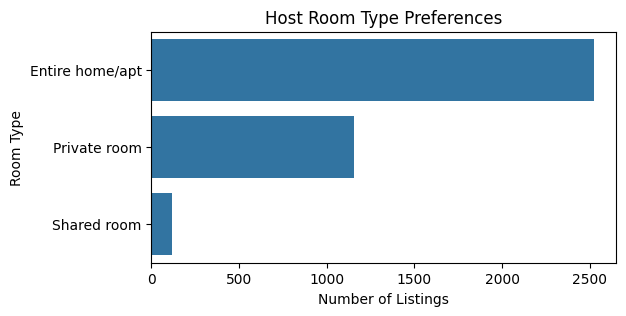

In [ ]:
# countplot for room types for the host
plt.figure(figsize=(6, 3))
sns.countplot(data=df1, y='room_type', order=get_order(df1['room_type']))
plot_label('Host Room Type Preferences','Number of Listings','Room Type')

Observation: The most favorable room type for host listing is 'Entire home/apt'

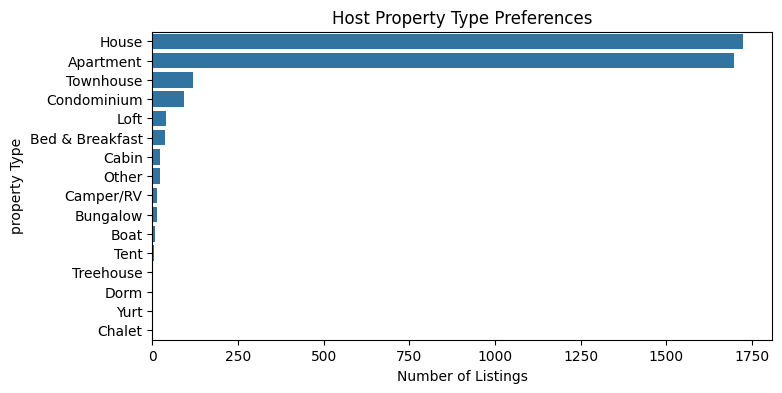

In [ ]:
# countplot for property types for the host
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, y='property_type', order=get_order(df1['property_type']))
plot_label('Host Property Type Preferences','Number of Listings','property Type')

Observation: The most favorable property type for host listing is 'House'

In [ ]:
# caculate average reviews for different property types
df1_reviewavg = df1.groupby('property_type').mean('number_of_reviews')
df1_reviewavg = df1_reviewavg.sort_values(by='number_of_reviews',ascending = False)
df1_reviewavg.head()

,bathrooms,bedrooms,number_of_reviews
property_type,,,
Cabin,1.000000,0.857143,92.571429
Camper/RV,0.846154,0.692308,49.076923
Loft,1.125000,0.750000,45.300000
Other,1.428571,0.809524,34.190476
Yurt,1.000000,0.000000,25.000000


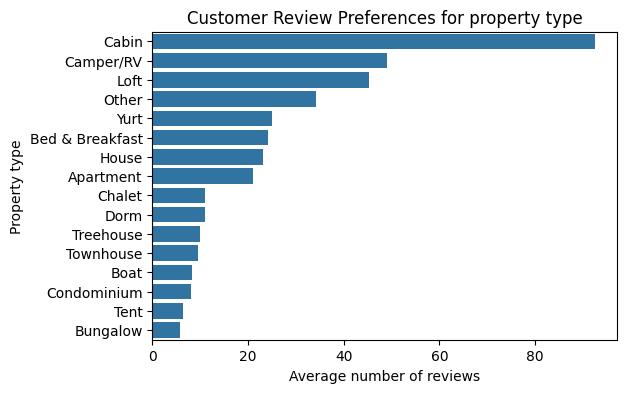

In [ ]:
#barplot customer average reviews for different property types
plt.figure(figsize=(6,4))
sns.barplot(x=df1_reviewavg.number_of_reviews,y=df1_reviewavg.number_of_reviews.index)
plot_label('Customer Review Preferences for property type','Average number of reviews','Property type')

Observation: The most favorable property type for custermer to write a review is 'Cabin'. Because it got the most average number of reviews. Total number of reviews is not a good metric, because the number of 'house' and 'apartment' is far more than other property types, even if each one of them receive much fewer reviews, the sum will be very large.

In [ ]:
# caculate average reviews for different room types
df1_rtreviewavg = df1.groupby('room_type').mean('number_of_reviews')
df1_rtreviewavg = df1_rtreviewavg.sort_values(by='number_of_reviews',ascending = False)
df1_rtreviewavg.head()

,bathrooms,bedrooms,number_of_reviews
room_type,,,
Private room,1.158283,1.00000,26.450997
Entire home/apt,1.307129,1.46297,20.569505
Shared room,1.243590,1.00000,12.940171


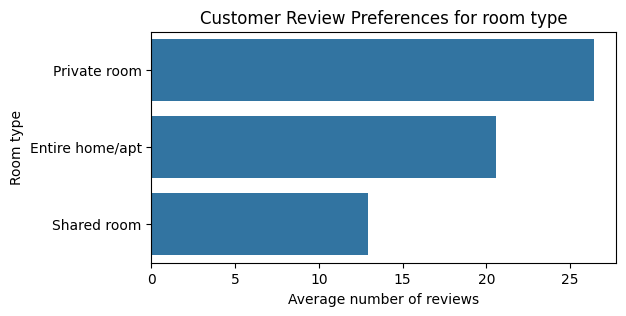

In [ ]:
#barplot customer average reviews for different room types
plt.figure(figsize=(6,3))
sns.barplot(x=df1_rtreviewavg.number_of_reviews,y=df1_rtreviewavg.number_of_reviews.index)
plot_label('Customer Review Preferences for room type','Average number of reviews','Room type')

Observation: The most favorable room type for custermer to write a review is 'Private room'.

**Answers to Q1:What kinds of property are favorate type in airbnb?**

>From host side, they prefer to list 'entire home/apartment' as room type. House and apartment are their favorate listing property type.

>From customer side, they are more willing to write reviews for property type 'Cabin' and room type 'Private room'

* **Which neighborhood are most popular?**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3811 entries, 0 to 3817
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3811 non-null   object 
 1   neighbourhood_group_cleansed  3811 non-null   object 
 2   zipcode                       3811 non-null   object 
 3   number_of_reviews             3811 non-null   float64
dtypes: float64(1), object(3)
memory usage: 277.9+ KB


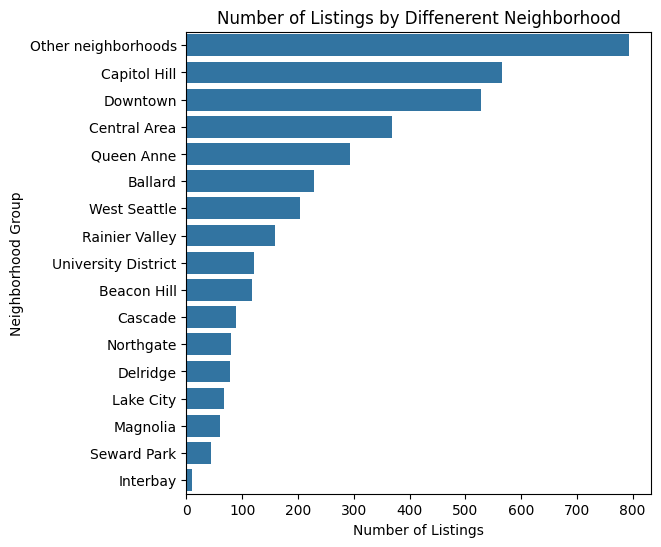

In [ ]:
# countplot for listings of neighbourhood
plt.figure(figsize=(6, 6))
sns.countplot(data=df2, y='neighbourhood_group_cleansed', order=get_order(df2['neighbourhood_group_cleansed']))
plot_label('Number of Listings by Diffenerent Neighborhood','Number of Listings','Neighborhood Group')

observation: Most listings come from 'other neighbourhood' and followed by Capitol hill. But since 'other neighbourhood' is very unclear, I add a plot to check the zipcode.

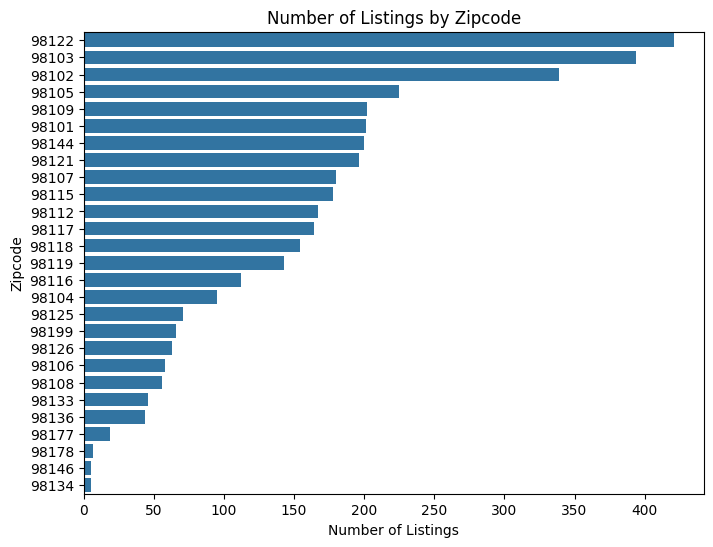

In [ ]:
# countplot for listings of zipcode
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, y='zipcode', order=get_order(df2['zipcode']))
plot_label('Number of Listings by Zipcode','Number of Listings','Zipcode')

observation: the most listing is in 98122 area, which includes part of capitol hill, part of central district, and part of madrona district.

**Answers to Q2:Which neighborhood are most popular?**

>Based on the zipcode, 98122 area is the most popular neighborhood for listings.

* **How well can I predict the price(in airbnb) of a property based on the data?**

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3788 non-null   object 
 1   room_type                     3788 non-null   object 
 2   property_type                 3788 non-null   object 
 3   bathrooms                     3788 non-null   float64
 4   bedrooms                      3788 non-null   float64
 5   accommodates                  3788 non-null   object 
 6   amenities                     3788 non-null   object 
 7   neighbourhood_group_cleansed  3788 non-null   object 
 8   zipcode                       3788 non-null   object 
 9   price                         3788 non-null   float64
 10  number_of_reviews             3788 non-null   float64
 11  review_scores_rating          3147 non-null   object 
 12  rating_is_null                3788 non-null   object 
dtypes: float

In [ ]:
df3['review_scores_rating'].fillna(df3['review_scores_rating'].mean(),inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3788 non-null   object 
 1   room_type                     3788 non-null   object 
 2   property_type                 3788 non-null   object 
 3   bathrooms                     3788 non-null   float64
 4   bedrooms                      3788 non-null   float64
 5   accommodates                  3788 non-null   object 
 6   amenities                     3788 non-null   object 
 7   neighbourhood_group_cleansed  3788 non-null   object 
 8   zipcode                       3788 non-null   object 
 9   price                         3788 non-null   float64
 10  number_of_reviews             3788 non-null   float64
 11  review_scores_rating          3788 non-null   float64
 12  rating_is_null                3788 non-null   object 
dtypes: float

<ipython-input-123-ce15d37a78c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['review_scores_rating'].fillna(df3['review_scores_rating'].mean(),inplace=True)


In [9]:
# import libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# Create dummy for room type
dummy_df_rmtp = pd.get_dummies(df3['room_type'])
print(dummy_df_rmtp.columns,dummy_df_rmtp.shape)

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object') (3788, 3)


In [ ]:
# Create dummy for property type
dummy_df_prtp = pd.get_dummies(df3['property_type'])
print(dummy_df_prtp.columns,dummy_df_prtp.shape)

Index(['Apartment', 'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin',
       'Camper/RV', 'Chalet', 'Condominium', 'Dorm', 'House', 'Loft', 'Other',
       'Tent', 'Townhouse', 'Treehouse', 'Yurt'],
      dtype='object') (3788, 16)


In [ ]:
# Create dummy for neighbourhood
dummy_df_nb = pd.get_dummies(df3['neighbourhood_group_cleansed'])
print(dummy_df_nb.columns,dummy_df_nb.shape)

Index(['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area',
       'Delridge', 'Downtown', 'Interbay', 'Lake City', 'Magnolia',
       'Northgate', 'Other neighborhoods', 'Queen Anne', 'Rainier Valley',
       'Seward Park', 'University District', 'West Seattle'],
      dtype='object') (3788, 17)


In [ ]:
# Create dummy for rating is null
dummy_df_rt = pd.get_dummies(df3['rating_is_null'])
dummy_df_rt.head()

,No,Yes
0,True,False
1,True,False
2,True,False
3,False,True
4,True,False


In [ ]:
# drop one column for regression
dummy_df_rmtp1 = dummy_df_rmtp.drop(columns='Shared room')
dummy_df_prtp1 = dummy_df_prtp.drop(columns='Other')
dummy_df_rt1 = dummy_df_rt.drop(columns = 'Yes')
dummy_df_nb1 = dummy_df_nb.drop(columns='Other neighborhoods')

In [ ]:
# create the final dataset with dummies for the regression
df3_wdumm = pd.concat([df3,dummy_df_rmtp1,dummy_df_prtp1,dummy_df_nb1,dummy_df_rt1],axis=1)
df3_wdumm.columns

Index(['id', 'room_type', 'property_type', 'bathrooms', 'bedrooms',
       'accommodates', 'amenities', 'neighbourhood_group_cleansed', 'zipcode',
       'price', 'number_of_reviews', 'review_scores_rating', 'rating_is_null',
       'Entire home/apt', 'Private room', 'Apartment', 'Bed & Breakfast',
       'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Chalet', 'Condominium',
       'Dorm', 'House', 'Loft', 'Tent', 'Townhouse', 'Treehouse', 'Yurt',
       'Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area',
       'Delridge', 'Downtown', 'Interbay', 'Lake City', 'Magnolia',
       'Northgate', 'Queen Anne', 'Rainier Valley', 'Seward Park',
       'University District', 'West Seattle', 'No'],
      dtype='object')

In [ ]:
# Double check the dataset
df3_wdumm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3788 entries, 0 to 3817
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3788 non-null   object 
 1   room_type                     3788 non-null   object 
 2   property_type                 3788 non-null   object 
 3   bathrooms                     3788 non-null   float64
 4   bedrooms                      3788 non-null   float64
 5   accommodates                  3788 non-null   object 
 6   amenities                     3788 non-null   object 
 7   neighbourhood_group_cleansed  3788 non-null   object 
 8   zipcode                       3788 non-null   object 
 9   price                         3788 non-null   float64
 10  number_of_reviews             3788 non-null   float64
 11  review_scores_rating          3788 non-null   float64
 12  rating_is_null                3788 non-null   object 
 13  Entire h

In [ ]:
# Define a function to record r2 and plot a r2 for different models and compare the regression results
# Note: this function is from source codes from the Udacity exercises
# Detail of reference is recorded at the end of the notebook and in the README.md
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        '''
     This is a revision of the previous code, 'LinearRegression' in 'sklearn' do not have "normalize" keyword
     The 'LinearRegression' in 'statsmodels' has the normalize keyword
    '''
        lm_model = make_pipeline(StandardScaler(), LinearRegression())
        #lm_model = LinearRegression()
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    '''
     This is a revision of the previous code, 'LinearRegression' in 'sklearn' do not have "normalize" keyword
     The 'LinearRegression' in 'statsmodels' has the normalize keyword
    '''
    lm_model = make_pipeline(StandardScaler(), LinearRegression())
    #lm_model = LinearRegression()
    lm_model.fit(X_train, y_train)


    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [ ]:
# double check the shape of dependent varibale is consistent with predictors
y = df3_wdumm['price']
y.shape

(3788,)

In [ ]:
# prepare the predictors
X = df3_wdumm.drop(columns=['id', 'room_type', 'property_type','accommodates', 'amenities', 'neighbourhood_group_cleansed', 'zipcode',
       'price','rating_is_null'])
X.columns

Index(['bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating',
       'Entire home/apt', 'Private room', 'Apartment', 'Bed & Breakfast',
       'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Chalet', 'Condominium',
       'Dorm', 'House', 'Loft', 'Tent', 'Townhouse', 'Treehouse', 'Yurt',
       'Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area',
       'Delridge', 'Downtown', 'Interbay', 'Lake City', 'Magnolia',
       'Northgate', 'Queen Anne', 'Rainier Valley', 'Seward Park',
       'University District', 'West Seattle', 'No'],
      dtype='object')

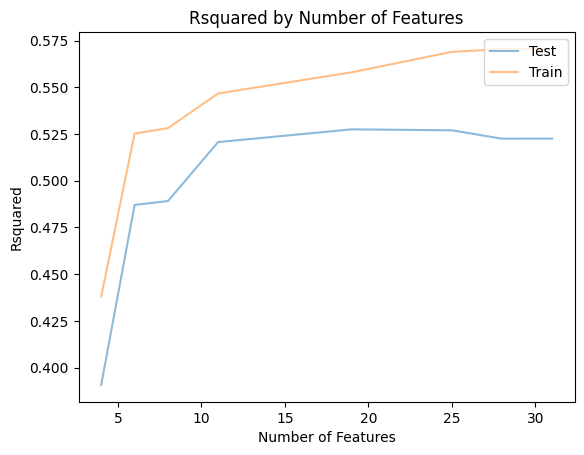

In [ ]:
#Cutoffs: number of missing values allowed in the one predictor.(The lower the values, the more predictors(features) in the model)
cutoffs = [3500, 2500, 1500, 500, 100, 50, 30, 10]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs,test_size = .3,random_state=4)

In [ ]:
# Show coeffcient and intercept for the model
coefficients = lm_model.named_steps['linearregression'].coef_
intercept = lm_model.named_steps['linearregression'].intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [18.62545542 42.66168029 -3.92620565  3.40477643 39.82957683 16.85996317
 -9.14545147 -7.43353507 -3.4978599  -0.34016539 -2.78921689  7.19713587
  0.89068862 13.49540388  7.94556521 -3.81648105 -0.31244275  0.4677189
 -1.98557399]
Intercept: 128.18106374952848


In [ ]:
# Check what columns are included for the best-fit model
X_train.columns

Index(['bathrooms', 'bedrooms', 'number_of_reviews', 'review_scores_rating',
       'Entire home/apt', 'Private room', 'Apartment', 'House', 'Townhouse',
       'Ballard', 'Beacon Hill', 'Capitol Hill', 'Central Area', 'Downtown',
       'Queen Anne', 'Rainier Valley', 'University District', 'West Seattle',
       'No'],
      dtype='object')

In [ ]:
# Check how many features and data are included for training set in the best-fit model
X_train.shape

(2651, 19)

In [ ]:
# Check the number of original features and data are included for training set in the best-fit model
X.shape

(3788, 38)

In [ ]:
# check the r2 for the test set
r2_scores_test

[0.39078347309096684,
 0.48705236990282286,
 0.4891311107329398,
 0.5206738286252472,
 0.5274814337137075,
 0.5269572931845051,
 0.5224915450390308,
 0.5225421177255766]

In [ ]:
# check the r2 for the training set
r2_scores_train

[0.4380976014902618,
 0.5252273487230834,
 0.5281342398378468,
 0.5466706060161473,
 0.5579931272321506,
 0.5689257322589925,
 0.5703931282840451,
 0.5704976421332284]

**Answers to Q3:How well can I predict the price(in airbnb) of a property based on the data?**

>Based on the model results, the best R-square for test data is 0.527. The best model use 19 out of 38 features as predictors.

#### References:
>Function name: `find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True)`
>
>Lesson Title: `Putting It All Together - Solution.ipynb`
>
> Sources Code Name: `AllTogether.py`
>
>Author: Udacity "Introduction to Data Science"
>Date: 2022
>
>Code version: N/A
>
>Availability: [Udacity-Intro-to-data-secience](https://learn.udacity.com/nanodegrees/nd025/parts/cd0017/lessons/e630cd91-988b-46bb-ad6c-4a0737172630/concepts/1dd4a20f-c4ad-474a-ab56-14f7050affb9)

In [ ]:

!jupyter nbconvert --to html /seattle-airbnb-data-analysis.ipynb

[NbConvertApp] Converting notebook /seattle-airbnb-data-analysis.ipynb to html
[NbConvertApp] Writing 1101832 bytes to /seattle-airbnb-data-analysis.html


In [4]:
pip show numpy

Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine-rl, ecos, flax, folium, geemap, gensim, gym, h5py, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, pandas-stubs, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, scikit-image, scikit-learn, scipy, scs, seaborn, sh

In [5]:
pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib

In [6]:
pip show matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, bigframes, datascience, fastai, geemap, imgaug, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


In [7]:
pip show seaborn

Name: seaborn
Version: 0.13.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


In [11]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
